<a href="https://colab.research.google.com/github/DaverArenas/MachineLearning_Introduction/blob/main/Metricas_Titanic_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Evaluacion de Modelos

## Matriz de Confusion

Verdaderos, Casos de la categoria de interes que son correctamente clasificados.   

- Verdaderos Positivos

- Verdaderos Negativos

Falsos, Casos de la categoria de interes que no son correctamente clasificados. 

- Falsos Negativos

- Falsos Positivos

## Medidas

$$ Precision =  \frac{\text{TP}}{\text{TP} + \text{FP}}  $$  

De todas las positivas que se han predicho correctamente, cuantos son realmente positivas.

---

La precision es una metrica muy util en los casos en los que los falsos positivos son una preocupacion mayor que los falsos negativos.

$$ Recall =  \frac{\text{TP}}{\text{TP} + \text{FN}}  $$ 

De todas las clases positivas cuantas se predijo correctamente

---

Es una metrica usada cuando tenemos una preocupacion por los falsos negativos.

$$ Accuracy =  \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FP} + \text{TN} + \text{FN}}  $$ 

De todas las clases cuales se predijo correctamente

$$ F score =  \frac{2 * \text{Recall} * \text{Precision}}{\text{Recall} + \text{Precision}}  $$ 

Para los casos en los que no tenemos una distincion clara entre cual de los falsos es mas importante.

---

En general es complejo construir un modelo con alto
nivel de precisión y recall, por tanto la media armónica
permite ponderar ambas medidas

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# 1: perro
# 0: gato

data = {'y_Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

In [ ]:
cm = confusion_matrix(data['y_Actual'], data['y_Predicted'])
cm


array([[5, 2],
       [1, 4]])

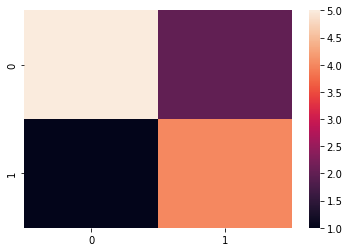

In [ ]:
sns.heatmap(cm)

## Curva ROC

- Permite comparar diferentes modelos para identificar cual otorga mejor rendimiento como clasificador.
- El area bajo la curva (AUC) puede ser utilizado como resumen de la calidad del modelo.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
n_prob = [0 for _ in range (len(y_test))]
n_prob

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(solver='lbfgs')
modelo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lr_prob = modelo.predict_proba(X_test)

In [ ]:
lr_prob = lr_prob[:,1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
se_auc_fp, se_auc_tp, _ = roc_curve(y_test, n_prob)
e_auc_fp, e_auc_tp, _ = roc_curve(y_test, lr_prob)

Text(0, 0.5, 'Tasa de Verdaderos positivos')

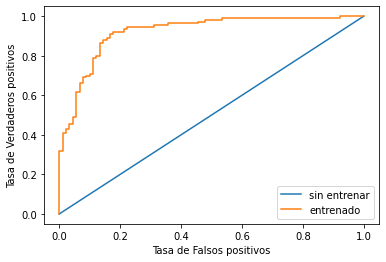

In [ ]:
plt.plot(se_auc_fp, se_auc_tp, label='sin entrenar')
plt.plot(e_auc_fp, e_auc_tp, label='entrenado')
plt.legend()
plt.xlabel('Tasa de Falsos positivos')
plt.ylabel('Tasa de Verdaderos positivos')

In [ ]:
#Score del modelo sin entrenar
roc_auc_score(y_test, n_prob)

0.5

In [ ]:
roc_auc_score(y_test, lr_prob)

0.9211111111111112

EJERCICIO DEL TITANIC

In [ ]:
#LEER LOS DATASETS

df_train = pd.read_csv('/content/drive/MyDrive/Especializacion BigData EIA/FundamentosAnalitica/CSV/train_titanic.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Especializacion BigData EIA/FundamentosAnalitica/CSV/test_titanic.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

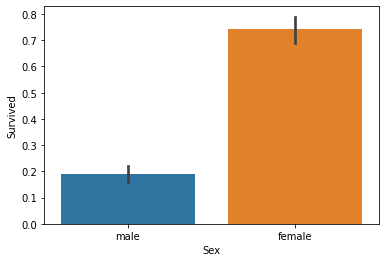

In [ ]:
sns.barplot (x='Sex', y='Survived', data=df_train)

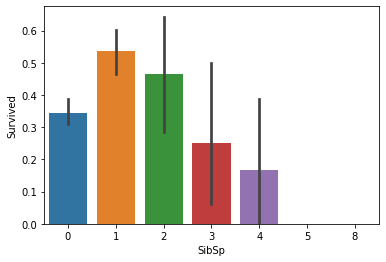

In [ ]:
sns.barplot (x='SibSp', y='Survived', data=df_train)

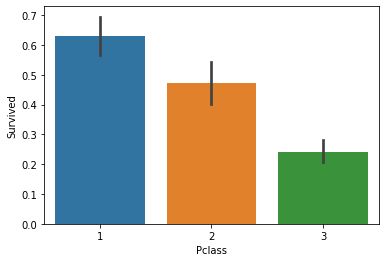

In [ ]:
sns.barplot (x='Pclass', y='Survived', data=df_train)

In [ ]:
#¿Cuántos nulos tenemos?
df_train['Age'].isnull().sum()

177

In [ ]:
#¿ Cuántas filas y columnas hay en el dataset?
df_train.shape

(891, 12)

In [ ]:
#Imputar edad.  Asignamos valores a los campos nulos
df_test['Age'] = df_test['Age'].fillna(-0.5)
df_train['Age'] = df_train['Age'].fillna(-0.5)

In [ ]:
labels = ['Unknown', 'Bebe', 'Niño', 'Adolescente', 'Joven', 'Adulto Joven', 'Adulto', 'Senior']
bins = [-1, 0, 4, 12, 18, 24, 35, 60, 100]

In [ ]:
#Etiquetamos la columna edad a partir del rango de edades generado en las variables anteriores. De esta manera podemos incluir los valores nulos de la edad en una nueva categoria: Unknown
#De esta forma podemos gestionar los nulos, no los eliminamos ni los llenamos con una media. Se transforma la columna en una variable categorica
df_test['AgeGroup'] = pd.cut(df_test['Age'], bins, labels=labels)
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins, labels=labels)

In [ ]:
df_train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    -0.5
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

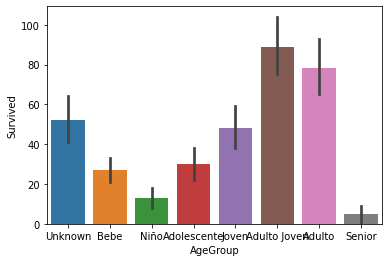

In [ ]:
sns.barplot (x='AgeGroup', y='Survived', data=df_train, estimator=sum)

In [ ]:
#Contar los valores o categorias dentro de una columna
df_train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
#Limpiando el dataset. Eliminamos las siguientes columnas que posiblemente no aporten al análisis
df_test = df_test.drop(['Ticket', 'Cabin'], axis=1) 
df_train = df_train.drop(['Ticket', 'Cabin'], axis=1) 

In [ ]:
#Cuántas personas se subieron en 'Q'
Q = df_train[df_train['Embarked'] == 'Q'].shape[0]
Q

77

In [ ]:
#Cuántas personas se subieron en 'C'
C = df_train[df_train['Embarked'] == 'C'].shape[0]
C

168

In [ ]:
#Imputamos el campo Embarked con la moda. Que tiene solo dos nulos
df_train = df_train.fillna({'Embarked': 'S'})

In [ ]:
combinados = [df_train, df_test]

In [ ]:
##Extraemos de la columna nombres del dataset las iniciales, tales como (Mr, Mrs, Miss, etc)
df_train.Name.str.extract(' ([A-Za-z]+)\.')

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [ ]:
##Creamos una nueva columna con las iniciales de los nombres
for dataset in combinados:
  dataset['Titulo'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Titulo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Joven,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adulto,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Adulto Joven,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Adulto Joven,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Adulto Joven,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Adulto Joven,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Joven,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,23.4500,S,Unknown,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Adulto Joven,Mr


In [ ]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Titulo
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Adulto Joven,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Adulto,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Senior,Miss
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Adulto Joven,Mrs
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Joven,Mr
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,-0.5,0,0,8.0500,S,Unknown,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Adulto,Mr
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Adulto,Mrs
416,1308,3,"Ware, Mr. Frederick",male,-0.5,0,0,8.0500,S,Unknown,Mrs


In [ ]:
for dataset in combinados:
  print(dataset['Titulo'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Titulo, dtype: int64
Mr        228
Miss      101
Mrs        58
Master     23
Rev         3
Dr          3
Don         1
Mme         1
Name: Titulo, dtype: int64


In [ ]:
##combinamos varias categorias que no suman, en una sola categoria que se llame raros
for dataset in combinados:
  dataset['Titulo'] = dataset['Titulo'].replace(['Capt', 'Col', 'Don','Dona','Dr','Major','Rev'], 'Raros')

In [ ]:
##combinamos varias categorias que no suman, en una sola categoria que se llame Duros
for dataset in combinados:
  dataset['Titulo'] = dataset['Titulo'].replace(['Sir', 'Mme', 'Jonkheer','Countess'], 'Duros')

In [ ]:
##combinamos varias categorias que no suman, en una sola categoria que se llame Duros
for dataset in combinados:
  dataset['Titulo'] = dataset['Titulo'].replace(['Mlle', 'Ms', 'Lady'], 'Mrs')

In [ ]:
#Cual es la media de sobrevivientes agrupando la columna Titulo por las categorias contenidas en esta columna
df_train[['Titulo', 'Survived']].groupby(['Titulo']).mean()

,Survived
Titulo,
Duros,0.750000
Master,0.575000
Miss,0.697802
Mr,0.156673
Mrs,0.798450
Raros,0.263158


In [ ]:
#Cual es la suma de sobrevivientes agrupando la columna por edades
df_train[['AgeGroup', 'Survived']].groupby(['AgeGroup']).sum()

,Survived
AgeGroup,
Unknown,52
Bebe,27
Niño,13
Adolescente,30
Joven,48
Adulto Joven,89
Adulto,78
Senior,5


In [ ]:
##Mapeamos la columna titulo para pasarla de categorica a numerica

titulos_mapeo = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Duros':5, 'Raros':6}

for dataset in combinados:
  dataset['Titulo'] = dataset['Titulo'].map(titulos_mapeo)

In [ ]:
##Eliminamos la columna Name del dataset
for dataset in combinados:
  dataset.drop('Name', axis=1, inplace=True)

In [ ]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Titulo
0,1,0,3,male,22.0,1,0,7.2500,S,Joven,1
1,2,1,1,female,38.0,1,0,71.2833,C,Adulto,3
2,3,1,3,female,26.0,0,0,7.9250,S,Adulto Joven,2
3,4,1,1,female,35.0,1,0,53.1000,S,Adulto Joven,3
4,5,0,3,male,35.0,0,0,8.0500,S,Adulto Joven,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,Adulto Joven,6
887,888,1,1,female,19.0,0,0,30.0000,S,Joven,2
888,889,0,3,female,-0.5,1,2,23.4500,S,Unknown,2
889,890,1,1,male,26.0,0,0,30.0000,C,Adulto Joven,1


In [ ]:
##Mapeamos las edades

In [ ]:
modas_edad = []
modas_edad_test = []
for i in range(1,7):
  modas_edad.append(df_train[df_train['Titulo']==i]['AgeGroup'].mode())
for i in range(1,7):
  modas_edad_test.append(df_test[df_test['Titulo']==i]['AgeGroup'].mode())

In [ ]:
modas_edad

[0    Adulto Joven
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Bebe' < 'Niño' < 'Adolescente' < 'Joven' < 'Adulto Joven' <
                          'Adulto' < 'Senior'], 0    Unknown
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Bebe' < 'Niño' < 'Adolescente' < 'Joven' < 'Adulto Joven' <
                          'Adulto' < 'Senior'], 0    Adulto
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Bebe' < 'Niño' < 'Adolescente' < 'Joven' < 'Adulto Joven' <
                          'Adulto' < 'Senior'], 0    Bebe
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Bebe' < 'Niño' < 'Adolescente' < 'Joven' < 'Adulto Joven' <
                          'Adulto' < 'Senior'], 0    Adulto
 Name: AgeGroup, dtype: category
 Categories (8, object): ['Unknown' < 'Bebe' < 'Niño' < 'Adolescente' < 'Joven' < 'Adulto Joven' <
                          'Adulto' < 'Senior'], 0    Adulto
 Name: AgeGroup, dtype

In [ ]:
modas_edad[1][0]

'Unknown'

In [ ]:
for i in range (6):
  print(modas_edad[i][0], modas_edad_test[i][0])

Adulto Joven Adulto
Unknown Adulto Joven
Adulto Adulto Joven
Bebe Adulto Joven
Adulto Adulto Joven
Adulto Joven


In [ ]:
df_train[df_train['Titulo']==2]['AgeGroup'].value_counts()

Unknown         36
Joven           33
Adulto Joven    32
Adolescente     29
Adulto          19
Bebe            17
Niño            15
Senior           1
Name: AgeGroup, dtype: int64

In [ ]:
modas_edad[2]

0    Adulto
Name: AgeGroup, dtype: category
Categories (8, object): ['Unknown' < 'Bebe' < 'Niño' < 'Adolescente' < 'Joven' < 'Adulto Joven' <
                         'Adulto' < 'Senior']

In [ ]:
imp_edad_unk = {1: 'Adulto Joven', 2:'Joven', 3:'Adulto', 4:'Bebe',5:'Adulto', 6:'Adulto'}

for x in range(len(df_train['AgeGroup'])):
  if df_train['AgeGroup'][x] == 'Unknown':
    df_train['AgeGroup'][x] = imp_edad_unk[df_train['Titulo'][x]]

In [ ]:
df_train['AgeGroup'].value_counts()

Adulto Joven    339
Adulto          213
Joven           174
Adolescente      70
Bebe             44
Niño             29
Senior           22
Unknown           0
Name: AgeGroup, dtype: int64

In [ ]:
modas_edad_test[2]

0    Adulto Joven
Name: AgeGroup, dtype: category
Categories (8, object): ['Unknown' < 'Bebe' < 'Niño' < 'Adolescente' < 'Joven' < 'Adulto Joven' <
                         'Adulto' < 'Senior']

In [ ]:
imp_edad_unk_test = {1: 'Adulto Joven', 2:'Joven', 3:'Adulto', 4:'Niño',5:'Adulto', 6:'Adulto'}

for x in range(len(df_test['AgeGroup'])):
  if df_test['AgeGroup'][x] == 'Unknown':
    df_test['AgeGroup'][x] = imp_edad_unk_test[df_test['Titulo'][x]]

In [ ]:
edad_mapeo = {'Bebe':1, 'Niño':2 , 'Adolescente': 3, 'Joven':4 ,'Adulto Joven':5, 'Adulto':6, 'Senior':7}

for dataset in combinados:
  dataset['AgeGroup'] = dataset['AgeGroup'].map(edad_mapeo)

In [ ]:
genero_mapeo = {'male':0, 'female':1}
for dataset in combinados:
  dataset['Sex'] = dataset['Sex'].map(genero_mapeo)

In [ ]:
emb_mapeo = {'S':0, 'C':1, 'Q':3}
for dataset in combinados:
  dataset['Embarked'] = dataset['Embarked'].map(emb_mapeo)

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Titulo
0,1,0,3,0,22.0,1,0,7.2500,0,4.0,1
1,2,1,1,1,38.0,1,0,71.2833,1,6.0,3
2,3,1,3,1,26.0,0,0,7.9250,0,5.0,2
3,4,1,1,1,35.0,1,0,53.1000,0,5.0,3
4,5,0,3,0,35.0,0,0,8.0500,0,5.0,1


In [ ]:
for x in range(len(df_test['Fare'])):
  if pd.isnull(df_test['Fare'][x]):
    pclass = df_test['Pclass'][x]
    df_test['Fare'][x] = round(df_train[df_train['Pclass']==pclass]['Fare'].mean(),4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
for dataset in combinados:
  dataset['FareCat'] = pd.qcut(dataset['Fare'], 4, labels=[1,2,3,4])

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Titulo,FareCat
0,1,0,3,0,22.0,1,0,7.2500,0,4.0,1,1
1,2,1,1,1,38.0,1,0,71.2833,1,6.0,3,4
2,3,1,3,1,26.0,0,0,7.9250,0,5.0,2,2
3,4,1,1,1,35.0,1,0,53.1000,0,5.0,3,4
4,5,0,3,0,35.0,0,0,8.0500,0,5.0,1,2


In [ ]:
X = df_train.copy()
X

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Titulo,FareCat
0,1,0,3,0,22.0,1,0,7.2500,0,4.0,1,1
1,2,1,1,1,38.0,1,0,71.2833,1,6.0,3,4
2,3,1,3,1,26.0,0,0,7.9250,0,5.0,2,2
3,4,1,1,1,35.0,1,0,53.1000,0,5.0,3,4
4,5,0,3,0,35.0,0,0,8.0500,0,5.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0,5.0,6,2
887,888,1,1,1,19.0,0,0,30.0000,0,4.0,2,3
888,889,0,3,1,-0.5,1,2,23.4500,0,4.0,2,3
889,890,1,1,0,26.0,0,0,30.0000,1,5.0,1,3


In [ ]:
X = X.drop(['Fare', 'Age', 'PassengerId', 'Survived'], axis=1)
y = df_train['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
X

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Titulo,FareCat
0,3,0,1,0,0,4.0,1,1
1,1,1,1,0,1,6.0,3,4
2,3,1,0,0,0,5.0,2,2
3,1,1,1,0,0,5.0,3,4
4,3,0,0,0,0,5.0,1,2
...,...,...,...,...,...,...,...,...
886,2,0,0,0,0,5.0,6,2
887,1,1,0,0,0,4.0,2,3
888,3,1,1,2,0,4.0,2,3
889,1,0,0,0,1,5.0,1,3


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=2, random_state=50)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def funcion_ayuda(y_corr, y_pred):
  cm = confusion_matrix(y_corr, y_pred)
  sns.heatmap(cm, annot=True, fmt='.3f', square=True)
  clasificacion_rep = pd.DataFrame(classification_report(y_corr, y_pred, output_dict=True))
  display(clasificacion_rep.round(2))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,accuracy,macro avg,weighted avg
precision,0.0,1.00,0.5,0.50,1.00
recall,0.0,0.50,0.5,0.25,0.50
f1-score,0.0,0.67,0.5,0.33,0.67
support,0.0,2.00,0.5,2.00,2.00


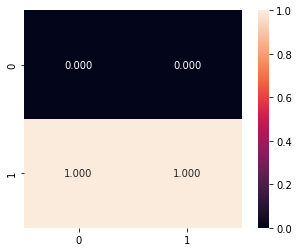

In [ ]:
from sklearn.linear_model import LogisticRegression
modelo_r1 = LogisticRegression(solver='liblinear')
modelo_r1.fit(X_train, y_train)

y_pred_lg = modelo_r1.predict(X_test)
funcion_ayuda(y_test, y_pred_lg)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,accuracy,macro avg,weighted avg
precision,0.0,1.00,0.5,0.50,1.00
recall,0.0,0.50,0.5,0.25,0.50
f1-score,0.0,0.67,0.5,0.33,0.67
support,0.0,2.00,0.5,2.00,2.00


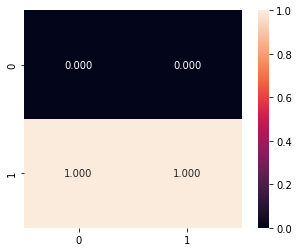

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo_tree = DecisionTreeClassifier()
modelo_tree.fit(X_train, y_train)


y_pred_tree = modelo_tree.predict(X_test)
funcion_ayuda(y_test, y_pred_tree)